In [16]:
# using the lstm 
# Trying to make a model that is trained on just 60 days old data 

# importing the library 
import math
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential 
from keras.layers import Dense, LSTM 
import matplotlib.pyplot as plt 
import pandas_datareader as web
plt.style.use('fivethirtyeight')

In [9]:
df = web.DataReader('AAPL', data_source = 'yahoo', start= "2012-01-01", end ='2020-9-17')

In [10]:
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,14.732142,14.607142,14.621428,14.686786,302220800.0,12.691425
2012-01-04,14.810000,14.617143,14.642858,14.765715,260022000.0,12.759631
2012-01-05,14.948215,14.738214,14.819643,14.929643,271269600.0,12.901293
2012-01-06,15.098214,14.972143,14.991786,15.085714,318292800.0,13.036158
2012-01-09,15.276786,15.048214,15.196428,15.061786,394024400.0,13.015480


In [12]:
df.shape

(2192, 6)

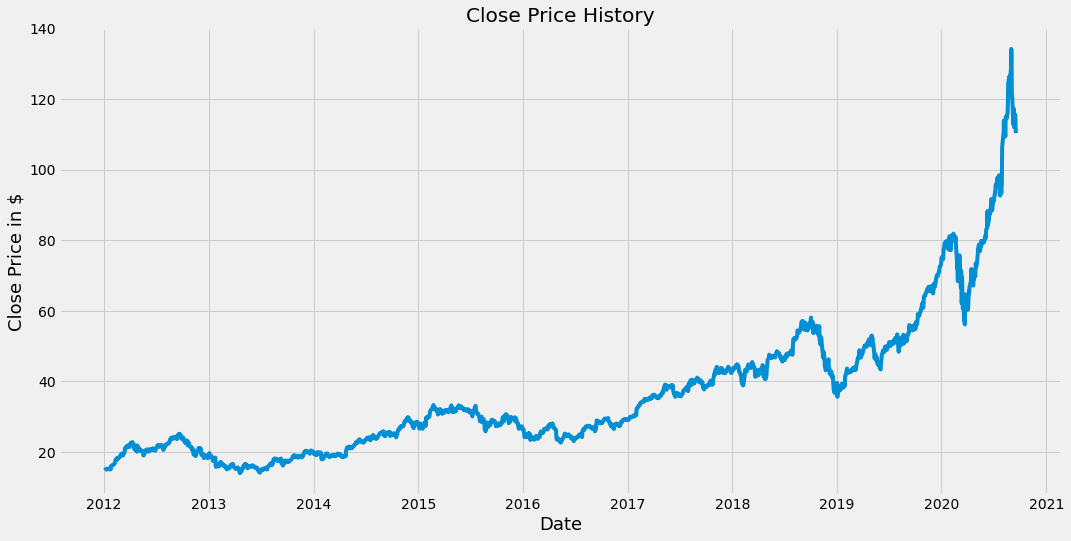

In [14]:
#Visualize the closing price history 

plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel("Date", fontsize = 18)
plt.ylabel("Close Price in $", fontsize = 18)
plt.show()

In [18]:
# close column 
data = df.filter(['Close'])

# dataframe_2_numpy
dataset = data.values

#getting the number of row to train the model on 
training_data_len =  math.ceil(len(dataset)*.8)

training_data_len

1754

In [19]:
#Scaling the data 

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.0061488 ],
       [0.00680527],
       [0.00816869],
       ...,
       [0.8449671 ],
       [0.81660535],
       [0.80171752]])

In [21]:
# create the training data set 
# creating the scaled training data_set 

train_data = scaled_data[0:training_data_len, :]

# processing the data into the training sets 

x_train = []
y_train = []

for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i, 0])
  y_train.append(train_data[i,0])

  if i<= 61:
    print(x_train)
    print(y_train)
    print()

[array([0.0061488 , 0.00680527, 0.00816869, 0.00946678, 0.00926776,
       0.00971629, 0.00951133, 0.00916676, 0.00869744, 0.01014998,
       0.01145994, 0.01105596, 0.00884299, 0.01095496, 0.00887566,
       0.01667305, 0.01607005, 0.01685722, 0.01855928, 0.01959001,
       0.01950387, 0.01918604, 0.02054056, 0.02181487, 0.02325851,
       0.0255903 , 0.03048855, 0.03056281, 0.03328967, 0.03532738,
       0.03182524, 0.03317382, 0.03314709, 0.03692846, 0.0363908 ,
       0.03738589, 0.0391741 , 0.0401692 , 0.04303567, 0.04512389,
       0.04572687, 0.04593778, 0.04236733, 0.04150589, 0.04163362,
       0.04499021, 0.04593482, 0.04796361, 0.05274602, 0.05912652,
       0.0579324 , 0.05793537, 0.06254846, 0.06399208, 0.06296431,
       0.06202567, 0.06104839, 0.06429507, 0.06652291, 0.06745562])]
[0.06515055661523342]

[array([0.0061488 , 0.00680527, 0.00816869, 0.00946678, 0.00926776,
       0.00971629, 0.00951133, 0.00916676, 0.00869744, 0.01014998,
       0.01145994, 0.01105596, 0.00

In [22]:
#Converting the x_training and y_training to numpy arrays 

x_train, y_train = np.array(x_train), np.array(y_train)

In [23]:
#reshaping the data 
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1],1))
print(x_train.shape)

(1694, 60, 1)


In [26]:
# building the model
model =  Sequential()
model.add(LSTM(50, return_sequences= True, input_shape = (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences= False))
model.add(Dense(25))
model.add(Dense(1))

In [27]:
#compile the model 

model.compile(optimizer='adam', loss = 'mean_squared_error')\


In [28]:
#training the model 
model.fit(x_train, y_train, batch_size=1 , epochs=10)

Epoch 1/10
1694/1694 [==============================] - 10s 6ms/step - loss: 2.5040e-04
Epoch 2/10
1694/1694 [==============================] - 10s 6ms/step - loss: 1.0684e-04
Epoch 3/10
1694/1694 [==============================] - 10s 6ms/step - loss: 1.1335e-04
Epoch 4/10
1694/1694 [==============================] - 10s 6ms/step - loss: 6.4406e-05
Epoch 5/10
1694/1694 [==============================] - 10s 6ms/step - loss: 6.8881e-05
Epoch 6/10
1694/1694 [==============================] - 10s 6ms/step - loss: 5.8114e-05
Epoch 7/10
1694/1694 [==============================] - 10s 6ms/step - loss: 5.6074e-05
Epoch 8/10
1694/1694 [==============================] - 10s 6ms/step - loss: 4.8229e-05
Epoch 9/10
1694/1694 [==============================] - 10s 6ms/step - loss: 5.0585e-05
Epoch 10/10
1694/1694 [==============================] - 10s 6ms/step - loss: 4.5539e-05


In [29]:
#creating the testing data 

test_data = scaled_data[training_data_len -60:, :]

# with the label 
x_test= []
y_test = dataset[training_data_len:, :]

for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])

In [30]:
x_test = np.array(x_test)

In [31]:
#reshape the data 
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1],1))

In [32]:
# get the models predicted the price values 
predictions =  model.predict(x_test)
predictions = scaler.inverse_transform(predictions)


In [33]:
# RMS
rmse =  np.sqrt(np.mean(predictions - y_test)**2)
rmse

1.079669003072939

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


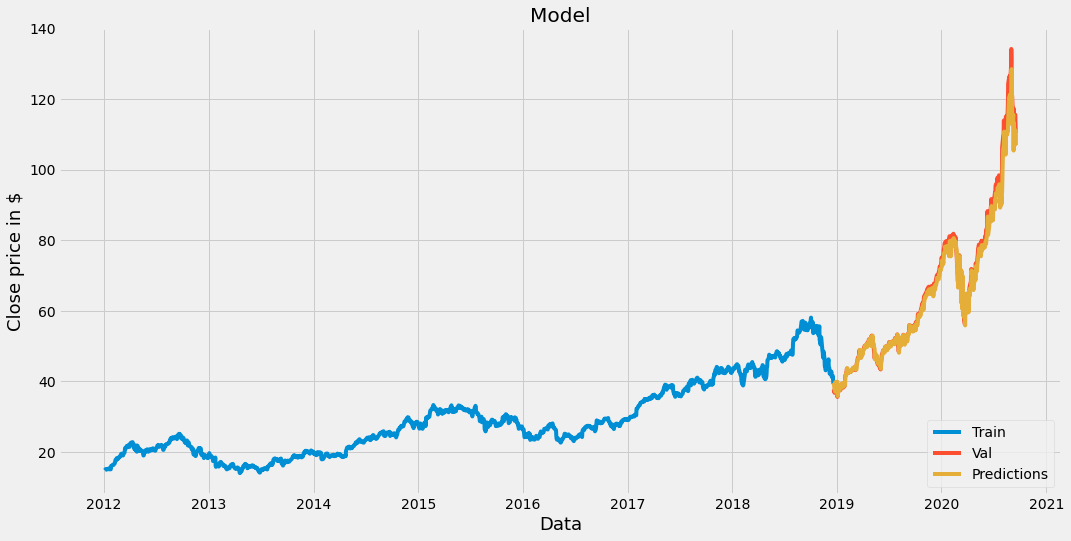

In [35]:
#plotting the data 

train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# visualizations 

plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Data', fontsize=  18)
plt.ylabel("Close price in $", fontsize = 18)
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train', "Val",'Predictions'], loc = 'lower right')
plt.show()

In [ ]:
# try to take epochs 1, 5